In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import os
dataset_path = "/content/drive/MyDrive/News dataset"
print(os.listdir(dataset_path))  # This will show the files inside the folder

['True.csv', 'Fake.csv']


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/News dataset/Fake.csv")

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<ipython-input-11-ae219b8259a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=fake, palette="husl")  # Use a different color palette


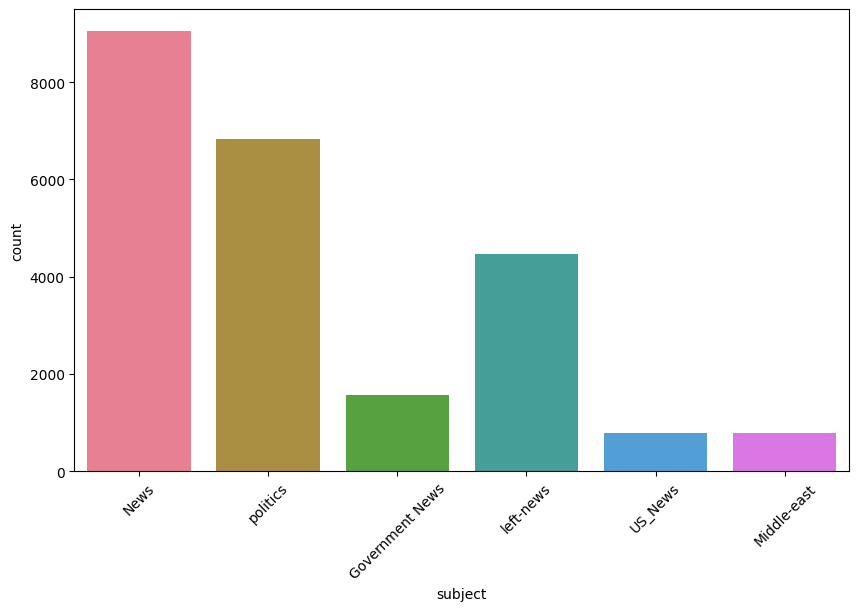

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=fake, palette="husl")  # Use a different color palette
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
text = ''.join(fake['text'].tolist())

In [ ]:
' '.join([' this ' , ' is ' , 'a' , ' data ' ] )

' this   is  a  data '

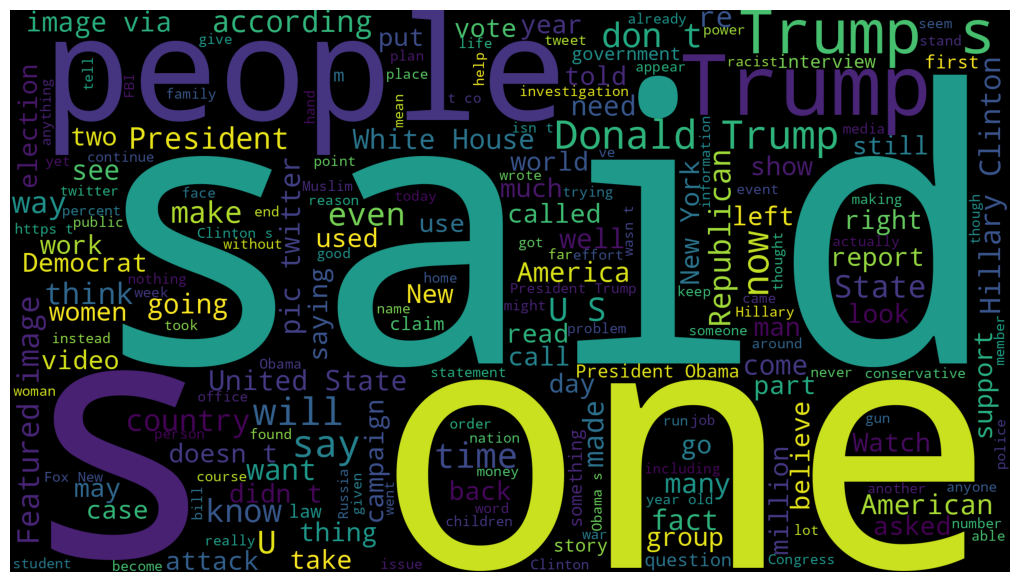

In [ ]:
wordcloud = WordCloud(width=1920, height = 1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real = pd.read_csv("/content/drive/MyDrive/News dataset/True.csv")

In [ ]:
text = ''.join(real['text'].tolist())

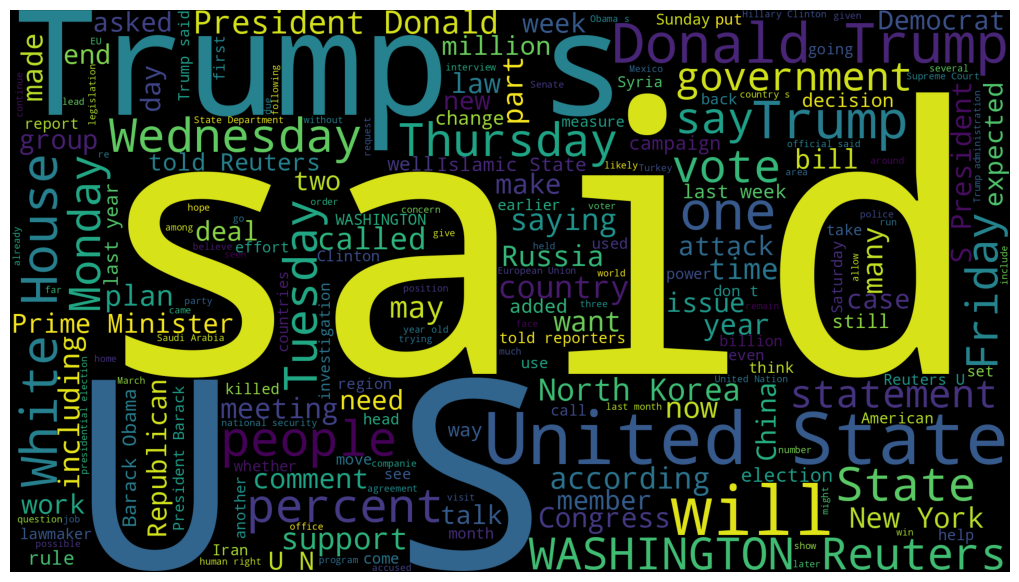

In [ ]:
wordcloud = WordCloud(width=1920, height = 1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real.sample(5)

,title,text,subject,date
20169,"Facing potential wheat crisis, Egypt plays dow...",CAIRO (Reuters) - Poppy seeds found in two car...,worldnews,"September 13, 2017"
5509,Appeals court to weigh rehearing of Trump trav...,(Reuters) - A U.S. federal appeals court on Fr...,politicsNews,"February 10, 2017"
20692,"Home Depot, Lowe's ship emergency material to ...",CHICAGO (Reuters) - Home improvement retailers...,worldnews,"September 6, 2017"
15400,Kremlin warns of mutual damage if Ukraine cuts...,MOSCOW (Reuters) - The Kremlin said on Wednesd...,worldnews,"November 8, 2017"
3416,Trump makes two conservative picks for Fed: NY...,(Reuters) - U.S. President Donald Trump’s pick...,politicsNews,"June 2, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real['text'].values):
    try:
        record = row.split(' - ',maxsplit=1)
        record[1]
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

35

In [ ]:
real.iloc[unknown_publishers]

,title,text,subject,date
2922,"Factbox: Trump on Twitter - Media, American tr...",The following statements were posted to the ve...,politicsNews,"July 3, 2017"
3488,White House unveils list of ex-lobbyists grant...,The White House on Wednesday disclosed a group...,politicsNews,"June 1, 2017"
3782,Trump on Twitter (May 15) - National Peace Off...,The following statements were posted to the ve...,politicsNews,"May 16, 2017"
4358,Factbox: Trump Supreme Court appointee to affe...,"Neil Gorsuch, President Donald Trump’s appoint...",politicsNews,"April 7, 2017"
4465,Window closing for Republican stealth assault ...,WASHINGTON The clock began running out this we...,politicsNews,"April 4, 2017"
5290,Trump on Twitter (Feb 24) - FBI leaks,The following statements were posted to the ve...,politicsNews,"February 24, 2017"
5379,"Trump on Twitter (Feb 17) - Tom Price, Boeing,...",The following statements were posted to the ve...,politicsNews,"February 17, 2017"
5412,"Trump on Twitter (Feb 16) - Stock market, NYT,...",The following statements were posted to the ve...,politicsNews,"February 16, 2017"
5504,"Trump on Twitter (Feb 10) - Japan, NYT, Tom Price",The following statements were posted to the ve...,politicsNews,"February 10, 2017"
5538,"Trump on Twitter (Feb 9) - U.S. appeals court,...",The following statements were posted to the ve...,politicsNews,"February 9, 2017"


In [ ]:
real.iloc[8970]

,8970
title,Graphic: Supreme Court roundup
text,
subject,politicsNews
date,"June 16, 2016"


In [ ]:
real = real.drop([8970], axis=0)

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
      tmp_text.append(row)
      publisher.append('Unknown')
    else:
        record = row.split('-', maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher
real['text']=tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()=="" ]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']


In [ ]:
real['text'] =  real['text'].apply(lambda x: str(x).lower())
fake['text'] =  fake['text'].apply(lambda x: str(x).lower())

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text','class']]

In [ ]:
fake = fake[['text','class']]

In [ ]:
import pandas as pd

data = pd.concat([real, fake], ignore_index=True)


In [ ]:
data.sample(5)

,text,class
39886,"germany: 10,000 muslims allegedly registered t...",0
11678,trump threatens to cut aid to u.n. members ove...,1
43753,boiler room ep #86 – kek comes to pizzatown tu...,0
9497,trump preparing plan to dismantle obama's wall...,1
44149,was gaddafi right about jfk? the late libyan l...,0


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 114.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restar

In [ ]:
!pip install googletrans==4.0.0-rc1


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
# Restart the kernel after running this cell (usually by clicking "Restart Kernel" in the notebook's menu)
import preprocess_kgptalkie as ps # Import the library after restarting

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-g_3okh0d
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-g_3okh0d
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8174 sha256=dd46329e4e3fc9642f32c29060982503635e5543e74567b1263477f9a39c208f
  Stored in directory: /tmp/pip-ephem-wheel-cache-41csjg39/wheels/74/fe/05/0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess_kgptalkie
  Attempting uninstall: preprocess_kgptalkie
    Found existing installation: preprocess_kgptalkie 0.11
    Uninstalling preprocess_kgptalkie-0.11:
      Successfully uninstalled preprocess_kgptalkie-0.11


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-s3awras_
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-s3awras_
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8174 sha256=99131221a3e16e91598376c47278d40267fb7af71c68fe2217be6cef902adaa6
  Stored in directory: /tmp/pip-ephem-wheel-cache-qctcaeml/wheels/74/fe/05/0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess_kgptalkie


In [ ]:
data ['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
ps.remove_special_chars('this ,. @ # is gre@t')

'this    is gret'

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [ ]:
!pip install gensim


In [ ]:
!pip install --no-cache-dir gensim


In [ ]:
!pip uninstall -y gensim numpy
!pip install numpy==1.23.5
!pip install gensim==4.3.1


Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 110.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompati

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 15.5 MB/s eta 0:00:00


In [ ]:
# 1️⃣ Remove the broken versions
!pip uninstall -y gensim scipy numpy

# 2️⃣ Install versions that work perfectly together
!pip install numpy==1.24.3 scipy==1.10.1 gensim==4.3.1

# 3️⃣ Restart your runtime (IMPORTANT)
import os
os.kill(os.getpid(), 9)


Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
ERROR: pip's dependency resolver does not currently take into account all 

In [ ]:
import gensim

In [ ]:
import pandas as pd

real = pd.read_csv("/content/drive/MyDrive/News dataset/True.csv") # Assuming real dataframe was constructed correctly in a previous cell
fake = pd.read_csv("/content/drive/MyDrive/News dataset/Fake.csv") # Assuming fake dataframe was constructed correctly in a previous cell

# Additional steps to process real and fake ... (your preprocessing code here)

data = pd.concat([real, fake], ignore_index=True) # Assigning the concatenated dataframe to data

In [ ]:
X = [d.split() for d in data ['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['WASHINGTON', '(Reuters)', '-', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'U.S.', 'Congress,', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts,', 'called', 'himself', 'a', '“fiscal', 'conservative”', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018.', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'Republicans,', 'U.S.', 'Representative', 'Mark', 'Meadows,', 'speaking', 'on', 'CBS’', '“Face', 'the', 'Nation,”', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending,', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'January.', 'When', 'they', 'return', 'from', 'the', 'holidays', 'on', 'Wednesday,', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues,', 'such', 'as', 'immigration', 'policy,', 

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1) # Changed 'size' to 'vector_size'

In [ ]:
len(w2v_model.wv.key_to_index)

397481

In [ ]:
w2v_model.wv['love']

array([-0.22089368,  0.46725357, -0.74296325, -2.6730614 , -0.3839917 ,
       -1.779908  , -3.6014347 ,  0.71596736, -4.1647615 ,  1.0392642 ,
       -2.054005  , -2.7403808 ,  0.93552   ,  0.19842954,  3.3538592 ,
       -2.149301  ,  1.6724793 , -2.6661763 ,  0.55556077,  0.9299244 ,
        3.8065543 , -2.9809394 , -0.62159723, -2.088719  ,  1.0340247 ,
        2.2654016 , -0.1351969 , -2.1594963 ,  1.1518983 , -0.263331  ,
        3.0704856 ,  0.9397627 ,  0.18888065, -1.5541681 ,  0.11979283,
        0.3331092 , -2.0666564 , -2.6743453 ,  0.59243655,  1.8705608 ,
        3.7390232 , -2.369552  ,  0.7856481 , -0.13536087, -1.4359517 ,
       -0.33541074,  1.2164774 ,  0.5610321 ,  0.9520852 , -0.5027473 ,
        0.76737523, -0.3121082 , -2.8362417 , -3.0494678 ,  3.0502293 ,
        0.9140165 , -1.4195738 , -2.3674772 , -1.529261  , -0.7134892 ,
        1.3269897 , -1.7654384 ,  3.065219  ,  2.9752927 , -1.195066  ,
        4.401061  , -1.4312136 , -3.8116634 , -3.0144315 ,  2.70

In [ ]:
w2v_model.wv.most_similar('US')

[('U.S.', 0.8093311190605164),
 ('U.S', 0.584659218788147),
 ('American', 0.5733518004417419),
 ('NATO', 0.5285175442695618),
 ('Russian', 0.5275849103927612),
 ('Iranian', 0.5214657187461853),
 ('Iraqi', 0.4889765977859497),
 ('Russia’s', 0.4850224554538727),
 ('states.Russia', 0.48367294669151306),
 ('UN', 0.4701104164123535)]

In [ ]:
w2v_model.wv.most_similar('trump')

[('Trump!', 0.6737417578697205),
 ('@realDonaldTrump', 0.6119831204414368),
 ("Trump's", 0.6105198264122009),
 ('(@Impeach_D_Trump)', 0.5885913968086243),
 ('2017Trump', 0.5842850208282471),
 ('Trump,”', 0.5837159752845764),
 ('2016Trump', 0.5815179944038391),
 ('Trump:', 0.5797285437583923),
 ('meth-addled', 0.5781409740447998),
 ('#Trump', 0.5762035846710205)]

In [ ]:
w2v_model.wv.most_similar('Nawaz')

[('Sharif', 0.7926376461982727),
 ('Sharif,', 0.7279753088951111),
 ('Ishaq', 0.6893882155418396),
 ('Thaksin', 0.6727113723754883),
 ('Keiko', 0.6603548526763916),
 ('ousted', 0.6384013891220093),
 ('Alberto', 0.6335403919219971),
 ('Yingluck,', 0.6291947960853577),
 ('Kenji', 0.6283411979675293),
 ('Ignatius', 0.617010235786438)]

In [ ]:
similar_imran = w2v_model.wv.most_similar('Imran')
similar_khan = w2v_model.wv.most_similar('Khan')
print(f"Words similar to Imran: {similar_imran}")
print(f"Words similar to Khan: {similar_khan}")

Words similar to Imran: [('Awan', 0.769741952419281), ('Jamal', 0.7011759281158447), ('Awan,', 0.6990633606910706), ('Abid,', 0.6812301278114319), ('Schultz,', 0.6727504134178162), ('Hina', 0.6605077981948853), ('Awan.', 0.657355010509491), ('estranged', 0.657282829284668), ('Weiner,', 0.649389922618866), ('captivity,', 0.6468572616577148)]
Words similar to Khan: [('Khizr', 0.7663554549217224), ('Khan,', 0.7622374296188354), ('Ghazala', 0.7162674069404602), ('Humayun', 0.6899469494819641), ('Sadiq', 0.6891033053398132), ('Omar', 0.6861507296562195), ('Muhammad', 0.6776397228240967), ('Khan’s', 0.6634541749954224), ('Imam', 0.635689377784729), ('Ahmed', 0.627575695514679)]


In [ ]:
!pip install numpy==1.24.3

ERROR: Operation cancelled by user


In [ ]:
!pip uninstall -y jax tensorflow numpy
!pip install tensorflow
!pip install jax[cpu]
!pip install numpy==1.24.3

Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 10.6 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.6.0 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.6.0 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
tf-keras 2.18.0 requires tensorflow<

In [ ]:
!pip uninstall -y jax tensorflow numpy ml_dtypes # Uninstall problematic packages
!pip install --no-cache-dir tensorflow  # Install tensorflow
!pip install --no-cache-dir jax[cpu]  # Install jax for CPU
!pip install --no-cache-dir numpy==1.24.3 # Install compatible numpy
!pip install --no-cache-dir "ml_dtypes>=0.3.0"  # Install or update ml_dtypes

# Restart the runtime
import os
os.kill(os.getpid(), 9)

Found existing installation: jax 0.6.0
Uninstalling jax-0.6.0:
  Successfully uninstalled jax-0.6.0
Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
Found existing installation: ml_dtypes 0.5.1
Uninstalling ml_dtypes-0.5.1:
  Successfully uninstalled ml_dtypes-0.5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 209.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 262.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 262.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optax 0.2.4 requires jax>=0.4.27, which is not install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 308.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 324.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
   ━━━━━━━━━━━

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import the Tokenizer class

tokenizer = Tokenizer() # Use a different variable name to avoid shadowing the class
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 's': 9,
 'for': 10,
 'is': 11,
 'he': 12,
 'with': 13,
 'was': 14,
 'it': 15,
 'as': 16,
 'trump': 17,
 'his': 18,
 'by': 19,
 'said': 20,
 'has': 21,
 'have': 22,
 'be': 23,
 'from': 24,
 'not': 25,
 'at': 26,
 'are': 27,
 'this': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'but': 32,
 'would': 33,
 'we': 34,
 'i': 35,
 'about': 36,
 'will': 37,
 'their': 38,
 'u.s.': 39,
 'had': 40,
 'president': 41,
 'been': 42,
 't': 43,
 'you': 44,
 'were': 45,
 'or': 46,
 'which': 47,
 'she': 48,
 'more': 49,
 'after': 50,
 'people': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'what': 55,
 'when': 56,
 '-': 57,
 'its': 58,
 'all': 59,
 'also': 60,
 'new': 61,
 'out': 62,
 'donald': 63,
 'over': 64,
 'our': 65,
 'no': 66,
 'state': 67,
 'there': 68,
 'up': 69,
 'said.': 70,
 'can': 71,
 'than': 72,
 'just': 73,
 'other': 74,
 'some': 75,
 'could': 76,
 'united': 77,
 'told': 78,
 'house': 79,
 'republican': 80,
 'into': 8

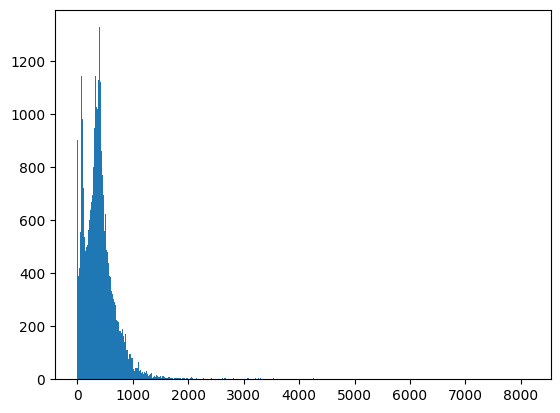

In [ ]:
import matplotlib.pyplot as plt # Importing the pyplot module and aliasing it as 'plt'

plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
import numpy as np # Import the numpy library and assign it to the alias 'np'

nos = np.array([len(x) for x in X]) # Now you can use 'np' to access numpy functions
len(nos[nos>1000])

1537

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import the pad_sequences function

maxlen = 1000
X = pad_sequences(X, maxlen=maxlen) # Now pad_sequences should be recognized

In [ ]:
len(X[0])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM)) # Change here: Pass a tuple for shape

    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]

    return weight_matrix

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))

    for word, i in vocab.items():
        try: # Attempt to get the word vector
            weight_matrix[i] = model.wv[word]
        except KeyError: # If the word is not found
            # Use a zero vector for unseen words (or handle it differently)
            weight_matrix[i] = np.zeros(DIM) # Fill with zeros
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(362594, 100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.initializers import Constant

model = Sequential()
model.add(Embedding(vocab_size,
                    output_dim=DIM,
                    embeddings_initializer=(embedding_vectors),
                    input_length=100,
                    trainable=False))  # Removed input_length
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, 100))  # Assuming input_
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │    36,259,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,376,777 (138.77 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 36,259,400 (138.32 MB)

In [ ]:
import pandas as pd

# Assuming you already loaded your real and fake dataframes
real = pd.read_csv("/content/drive/MyDrive/News dataset/True.csv")
fake = pd.read_csv("/content/drive/MyDrive/News dataset/Fake.csv")

# ... (Your preprocessing code) ...

# Instead of 'class', use 'label' or another name
real['label'] = 1
fake['label'] = 0

# Select columns before concatenation
real = real[['text', 'label']]
fake = fake[['text', 'label']]

# Concatenate
data = pd.concat([real, fake], ignore_index=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)


Epoch 1/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 46s 39ms/step - acc: 0.9297 - loss: 0.1813 - val_acc: 0.9952 - val_loss: 0.0195
Epoch 2/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - acc: 0.9899 - loss: 0.0359 - val_acc: 0.9967 - val_loss: 0.0278
Epoch 3/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - acc: 0.9973 - loss: 0.0136 - val_acc: 0.9979 - val_loss: 0.0076
Epoch 4/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 44s 39ms/step - acc: 0.9988 - loss: 0.0042 - val_acc: 0.9983 - val_loss: 0.0053
Epoch 5/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - acc: 0.9991 - loss: 0.0029 - val_acc: 0.9982 - val_loss: 0.0070
Epoch 6/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - acc: 0.9992 - loss: 0.0027 - val_acc: 0.9988 - val_loss: 0.0052
Epoch 7/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - acc: 0.9994 - loss: 0.0020 - val_acc: 0.9980 - val_loss: 0.0073
Epoch 8/8
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - acc: 0.9994 - loss: 0.0029 - val_acc: 0.9971 - val_loss: 0.0097


In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9971046770601336

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
X = ['this is a news']
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=maxlen) # Changed 'x' to 'X'
(model.predict(X) >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0]])

In [ ]:
model.save('my_model.h5')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/my_model.h5')
